In [32]:
import requests
from requests import HTTPError, JSONDecodeError
from pprint import pprint
import csv
from datetime import datetime
import os

def fetch_aqi_data() -> list[dict]:
    """從環保署 API 獲取空氣品質指標資料"""
    try:
        url = 'https://data.moenv.gov.tw/api/v2/aqx_p_432?api_key=af57253c-e838-46da-a1f5-12b43afd75f3&limit=1000&sort=ImportDate desc&format=JSON'
        response = requests.get(url, verify=False)
        response.raise_for_status()
        records = response.json()['records']
        return records
    except HTTPError as error:
        raise Exception(f"HTTP 錯誤: {error}")
    except JSONDecodeError as error:
        raise Exception(f"JSON 解析錯誤: {str(error)}")
    except Exception as error:
        raise Exception(f"未知錯誤: {str(error)}")

def extract_site_info(sites: list[dict]) -> list[dict]:
    """提取站點的關鍵資訊（站名、城市、AQI、狀態）"""
    extracted_sites = []
    for site in sites:
        site_info = {
            "站點名稱": site['sitename'],
            "城市名稱": site['county'],
            "AQI": site['aqi'],
            "狀態": site['status']
        }
        extracted_sites.append(site_info)
    return extracted_sites

def export_to_csv(data: list[dict]) -> None:
    """將資料匯出為 CSV 檔案，檔案名稱包含時間戳記"""
    if not data:
        print("沒有資料可匯出")
        return
    
    try:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"aqi_data_{timestamp}.csv"
        
        with open(filename, 'w', newline='', encoding='utf-8-sig') as csvfile:
            fieldnames = data[0].keys()
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            
            writer.writeheader()
            writer.writerows(data)
        
        full_path = os.path.abspath(filename)
        print(f"資料已成功匯出至: {full_path}")
    except IOError as error:
        print(f"檔案寫入錯誤: {str(error)}")
    except Exception as error:
        print(f"匯出過程出錯: {str(error)}")

def main():
    """主程式：下載、提取、匯出空氣品質資料"""
    try:
        print("正在下載空氣品質資料...")
        aqi_records = fetch_aqi_data()
        print(f"成功下載 {len(aqi_records)} 筆資料")
    except Exception as error:
        print(f"下載失敗: {error}")
        return
    
    print("正在提取資訊...")
    site_info_list = extract_site_info(aqi_records)
    
    print("正在匯出 CSV...")
    export_to_csv(site_info_list)

if __name__ == "__main__":
    main()

正在下載空氣品質資料...


/opt/conda/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.moenv.gov.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


成功下載 86 筆資料
正在提取資訊...
正在匯出 CSV...
資料已成功匯出至: /workspaces/aiclass/lesson12/aqi_data_20251120_124932.csv


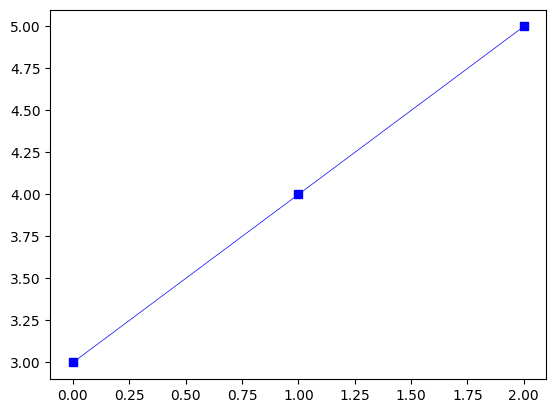

In [43]:
import matplotlib.pyplot as plt

# 1.製作figure
fig = plt.figure()

# 2.在1.的figure上製作一個axes
ax_1 = fig.add_subplot(1, 1, 1)

# 3.將圖的數據儲存在axes中
X = [0, 1, 2]
Y = [3, 4, 5]
ax_1.plot(X, Y, color='blue', marker='s', linestyle='solid', linewidth=0.5,  label='series2')

# 4.顯示圖
plt.show()

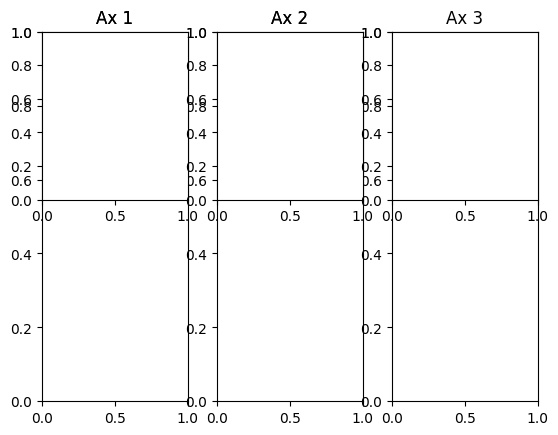

In [45]:
import matplotlib.pyplot as plt
# 1.製作figure
fig = plt.figure()

# 2.1*3的矩陣圖表的第1個axes
ax_1 = fig.add_subplot(1, 3, 1)

# 設定ax_1的標題
ax_1.set_title(label='Ax 1')

# 2.1*3的矩陣圖表的第2個axes
ax_2 = fig.add_subplot(1, 3, 2)
# 設定ax_2的標題
ax_2.set_title(label='Ax 2')

# 2.1*3的矩陣圖表的第3個axes
ax_3 = fig.add_subplot(1, 3, 3)
# 設定ax_3的標題
ax_3.set_title(label='Ax 3')
ax_4 = fig.add_subplot(2, 3, 1)

# 設定ax_1的標題
ax_4.set_title(label='Ax 1')

# 2.1*3的矩陣圖表的第2個axes
ax_5 = fig.add_subplot(2, 3, 2)
# 設定ax_2的標題
ax_5.set_title(label='Ax 2')

# 2.1*3的矩陣圖表的第3個axes
ax_6 = fig.add_subplot(2, 3, 3)
# 設定ax_3的標題
ax_3.set_title(label='Ax 3')
# 36顯示圖
plt.show()